In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [100]:
train = pd.read_csv('train4.csv',sep=',')
test = pd.read_table('test4.txt',sep=',', encoding='cp1252')

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [15]:
train.head()

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,variety,winery,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,White Blend,Nicosia,NaN,NaN,NaN,NaN
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15,Douro,NaN,NaN,Roger Voss,Portuguese Red,Quinta dos Avidagos,NaN,NaN,NaN,NaN
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm,NaN,NaN,NaN,NaN
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,Riesling,St. Julian,NaN,NaN,NaN,NaN
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Noir,Sweet Cheeks,NaN,NaN,NaN,NaN


In [16]:
train.columns

Index(['index', 'country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'taster_name', 'variety', 'winery',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

In [17]:
train.isnull().sum()

index              0
country           28
description        0
designation    14340
points            12
price           3530
province          30
region_1        8203
region_2       30770
taster_name    10263
variety            0
winery             0
Unnamed: 12    49958
Unnamed: 13    49988
Unnamed: 14    50000
Unnamed: 15    50000
dtype: int64

In [24]:
idxlist = []

In [26]:
idx_15 = train[train['Unnamed: 15'].notnull()].index
idx_14 = train[train['Unnamed: 14'].notnull()].index
idx_13 = train[train['Unnamed: 13'].notnull()].index
idx_12 = train[train['Unnamed: 12'].notnull()].index

In [27]:
idxlist.extend(list(idx_15))
idxlist.extend(list(idx_14))
idxlist.extend(list(idx_13))
idxlist.extend(list(idx_12))

In [29]:
len(idxlist)

58

In [18]:
train[train['Unnamed: 15'].notnull()]

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,variety,winery,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
2182,2182,US,"Don't let the playful label fool you, this is ...",Ryker Red,Pilot Ridge Vineyard,Estate Grown,90,25,California,El Dorado,@gordone_cellars,Hart 2 Hart 2014 Ryker Red,Pilot Ridge Vineyard,Estate Grown Red (El Dorado),Bordeaux-style Red Blend,Hart 2 Hart


In [19]:
train[train['Unnamed: 14'].notnull()]

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,variety,winery,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
2182,2182,US,"Don't let the playful label fool you, this is ...",Ryker Red,Pilot Ridge Vineyard,Estate Grown,90,25,California,El Dorado,@gordone_cellars,Hart 2 Hart 2014 Ryker Red,Pilot Ridge Vineyard,Estate Grown Red (El Dorado),Bordeaux-style Red Blend,Hart 2 Hart


In [20]:
train[train['Unnamed: 13'].notnull()]

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,variety,winery,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
490,490,Spain,"Lime, apple and mineral aromas come with a not...",Reserva Brut,87,19,Catalonia,Cava,NaN,Michael Schachner,Cellars NV Reserva Brut Sparkling (Cava),Sparkling Blend,V&N,Cellars,NaN,NaN
2182,2182,US,"Don't let the playful label fool you, this is ...",Ryker Red,Pilot Ridge Vineyard,Estate Grown,90,25,California,El Dorado,@gordone_cellars,Hart 2 Hart 2014 Ryker Red,Pilot Ridge Vineyard,Estate Grown Red (El Dorado),Bordeaux-style Red Blend,Hart 2 Hart
8309,8309,Austria,Flint and yeast vie with each other to give th...,Hundsleiten Reserve,92,34,Weinviertel,NaN,NaN,Anne Krebiehl MW,Pfaffl 2015 Hundsleiten Reserve Grüner Veltli...,Grüner Veltliner,R&A,Pfaffl,NaN,NaN
12629,12629,Austria,Fine green fruit gives great freshness in this...,Haidviertel,88,23,Weinviertel,NaN,NaN,Roger Voss,Pfaffl 2008 Haidviertel Grüner Veltliner (Wei...,Grüner Veltliner,R&A,Pfaffl,NaN,NaN
15276,15276,Austria,"The savory, yeasty nose comes with a hint of s...",Zeiseneck,90,18,Weinviertel,NaN,NaN,Anne Krebiehl MW,Pfaffl 2015 Zeiseneck Grüner Veltliner (Weinv...,Grüner Veltliner,R&A,Pfaffl,NaN,NaN
17254,17254,Germany,There's an appealing nose of ripe yellow stone...,Bechtheimer Stein Spätlese,89,15,Rheinhessen,NaN,NaN,NaN,Machmer 2008 Bechtheimer Stein Spätlese Gewür...,Gewürztraminer,G&M,Machmer,NaN,NaN
27426,27426,Austria,This is a typically fragrant and fresh Grüner ...,Hundsleiten Reserve,91,NaN,Weinviertel,NaN,NaN,Roger Voss,Pfaffl 2011 Hundsleiten Reserve Grüner Veltli...,Grüner Veltliner,R&A,Pfaffl,NaN,NaN
29119,29119,Germany,Lychee and honeysuckle notes are concentrated ...,Bechtheimer Spätlese,89,13,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,Machmer 2013 Bechtheimer Spätlese Gewürztrami...,Gewürztraminer,G&M,Machmer,NaN,NaN
30663,30663,Cyprus,"This Cypriot white has a rich, lemony nose and...",NaN,85,16,Pafos,NaN,NaN,Susan Kostrzewa,Vasilikon 2010 Xynisteri (Pafos),Xynisteri,K&K,Vasilikon,NaN,NaN
36417,36417,US,"As always with Morgan's Pinot Gris, the 2009 i...",R&D,Franscioni Vineyard,87,17,California,Santa Lucia Highlands,Central Coast,Morgan 2009 R&D,Franscioni Vineyard Pinot Gris (Santa Lucia H...,Pinot Gris,Morgan,NaN,NaN


In [19]:
train[train['Unnamed: 12'].notnull()]

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,variety,winery,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
381,381,Italy,It's testament to this wine's balance that it ...,the flavors are earthy and hint at mineral oi...,Vigne Alte,88,11,Veneto,Bianco di Custoza,NaN,Fratelli Zeni 2000 Vigne Alte (Bianco di Cust...,White Blend,Fratelli Zeni,NaN,NaN,NaN
490,490,Spain,"Lime, apple and mineral aromas come with a not...",Reserva Brut,87,19,Catalonia,Cava,NaN,Michael Schachner,Cellars NV Reserva Brut Sparkling (Cava),Sparkling Blend,V&N,Cellars,NaN,NaN
1366,1366,Chile,Lavender and licorice on the nose,the palate mixes shy black cherry and cassis ...,Reserve,87,9,Maipo Valley,NaN,NaN,Santa Alicia 2006 Reserve Cabernet Sauvignon (...,Cabernet Sauvignon,Santa Alicia,NaN,NaN,NaN
2039,2039,Italy,There's a beautifully delicate nature to this ...,there's enough pulp and structure to guarante...,Sistaglia,92,NaN,Piedmont,Barolo,NaN,Deltetto 2006 Sistaglia (Barolo),Nebbiolo,Deltetto,NaN,NaN,NaN
2182,2182,US,"Don't let the playful label fool you, this is ...",Ryker Red,Pilot Ridge Vineyard,Estate Grown,90,25,California,El Dorado,@gordone_cellars,Hart 2 Hart 2014 Ryker Red,Pilot Ridge Vineyard,Estate Grown Red (El Dorado),Bordeaux-style Red Blend,Hart 2 Hart
8309,8309,Austria,Flint and yeast vie with each other to give th...,Hundsleiten Reserve,92,34,Weinviertel,NaN,NaN,Anne Krebiehl MW,Pfaffl 2015 Hundsleiten Reserve Grüner Veltli...,Grüner Veltliner,R&A,Pfaffl,NaN,NaN
9121,9121,France,Ripe plum fruits give this big and fruity wine...,drink from 2018.,NaN,90,25,Bordeaux,Médoc,NaN,Château Castera 2011 Médoc,Bordeaux-style Red Blend,Château Castera,NaN,NaN,NaN
11049,11049,France,Both the aromas and the palate shout out the w...,a wine with a good future. Drink from 2017.,Grande Réserve,89,20,Southwest France,Côtes de Gascogne,NaN,Domaine Chiroulet 2011 Grande Réserve Red (Côt...,Merlot-Tannat,Domaine Chiroulet,NaN,NaN,NaN
11085,11085,France,A white this age should be fresh and crisp,this one is a bit dull and shows only faint b...,NaN,80,8,Southwest France,Bergerac,NaN,Seigneurs de Bergerac 1999 White (Bergerac),White Blend,Seigneurs de Bergerac,NaN,NaN,NaN
11753,11753,US,This is a standout in this price range. The we...,the tannins are polished and there is an intr...,JV Estate,89,25,Oregon,Dundee Hills,Willamette Valley,Stoller 2007 JV Estate Pinot Noir (Dundee Hills),Pinot Noir,Stoller,NaN,NaN,NaN


### drop index

In [35]:
train = train.drop(idxlist)
train = train.drop(columns=['Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15'])

### make dataset

In [41]:
len_train = len(train)

In [42]:
test = test.drop(columns=['Unnamed: 10','Unnamed: 11'])

In [43]:
dataset = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [47]:
dataset

,country,description,designation,index,points,price,province,region_1,region_2,taster_name,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,0,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,1,87,15,Douro,NaN,NaN,Roger Voss,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,2,87,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,3,87,13,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,4,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,5,87,15,Northern Spain,Navarra,NaN,Michael Schachner,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,6,87,16,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,7,87,24,Alsace,Alsace,NaN,Roger Voss,Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,8,87,12,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,9,87,27,Alsace,Alsace,NaN,Roger Voss,Pinot Gris,Jean-Baptiste Adam


In [48]:
dataset.fillna('missing')

,country,description,designation,index,points,price,province,region_1,region_2,taster_name,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,0,87,missing,Sicily & Sardinia,Etna,missing,Kerin O’Keefe,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,1,87,15,Douro,missing,missing,Roger Voss,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",missing,2,87,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,3,87,13,Michigan,Lake Michigan Shore,missing,Alexander Peartree,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,4,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,5,87,15,Northern Spain,Navarra,missing,Michael Schachner,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,6,87,16,Sicily & Sardinia,Vittoria,missing,Kerin O’Keefe,Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,missing,7,87,24,Alsace,Alsace,missing,Roger Voss,Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,8,87,12,Rheinhessen,missing,missing,Anna Lee C. Iijima,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,9,87,27,Alsace,Alsace,missing,Roger Voss,Pinot Gris,Jean-Baptiste Adam


In [76]:
train_ = train.copy()

In [77]:
train_['points'] = train['points'].fillna(90).astype('int')
train_['price'] = train['price'].fillna(90).astype('int')

In [79]:
train_.corr()['points']

index     0.033514
points    1.000000
price     0.401279
Name: points, dtype: float64

In [49]:
category_list = ['country','designation','province','region_1','region_2','taster_name',\
                'variety','winery']

In [50]:
for cl in category_list:
    print(cl,dataset[cl].nunique())

country 41
designation 20074
province 363
region_1 1065
region_2 17
taster_name 20
variety 558
winery 12269


In [83]:
train_.describe()

,index,points,price
count,49958.000000,49958.000000,49958.000000
mean,24999.838624,88.456083,39.234997
std,14433.964257,3.047873,40.725725
min,0.000000,80.000000,4.000000
25%,12500.250000,86.000000,18.000000
50%,24999.500000,88.000000,28.000000
75%,37501.750000,91.000000,49.000000
max,50000.000000,100.000000,2500.000000


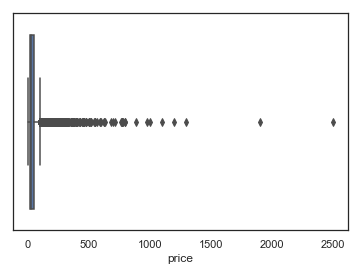

In [85]:
sns.boxplot(train_.price)

In [87]:
train_ = train_[train_.price<100]

In [90]:
len_train_ = len(train_)

In [94]:
dataset_ = pd.concat(objs=[train_, test], axis=0).reset_index(drop=True)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [95]:
dataset_

,country,description,designation,index,points,price,province,region_1,region_2,taster_name,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,0,87.0,90.0,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,1,87.0,15.0,Douro,NaN,NaN,Roger Voss,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,2,87.0,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,3,87.0,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,4,87.0,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,5,87.0,15.0,Northern Spain,Navarra,NaN,Michael Schachner,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,6,87.0,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,7,87.0,24.0,Alsace,Alsace,NaN,Roger Voss,Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,8,87.0,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,9,87.0,27.0,Alsace,Alsace,NaN,Roger Voss,Pinot Gris,Jean-Baptiste Adam


In [124]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [96]:
dataset_ = dataset_[['description','country','points','taster_name']]

In [126]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

# transform 

corpus = dataset_['description'].values
sentlist = []
for sent in corpus:
    st = word_tokenize(sent)
    pswords = [ps.stem(w) for w in st]
    sentlist.append(' '.join(pswords))
sentlist = np.array(sentlist)
tfidfv = TfidfVectorizer().fit(sentlist)
print(tfidfv.transform(sentlist).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [127]:
tfidf_arr = tfidfv.transform(corpus).toarray()

In [128]:
tfidf_arr.shape

(48512, 16914)

In [129]:
idx_imp = np.argmax(tfidf_arr,axis=1)

In [130]:
idx_imp.shape

(48512,)

In [131]:
voc = tfidfv.vocabulary_

In [132]:
rev_voc = {idx:name for name, idx in voc.items() }

In [133]:
for i, idx in enumerate(idx_imp):
    print(i, ":", rev_voc[idx])

0 : dried
1 : drinkable
2 : flavors
3 : opulent
4 : characteristics
5 : this
6 : balanced
7 : offers
8 : elegant
9 : has
10 : complete
11 : aftertaste
12 : offers
13 : drying
14 : approachable
15 : sprightly
16 : balance
17 : apparent
18 : aromas
19 : notes
20 : notes
21 : aged
22 : delicate
23 : geneseo
24 : drying
25 : elevation
26 : delicate
27 : offers
28 : berry
29 : this
30 : this
31 : this
32 : honeysuckle
33 : berries
34 : this
35 : many
36 : chunky
37 : offers
38 : has
39 : this
40 : expression
41 : this
42 : this
43 : this
44 : racy
45 : drying
46 : drying
47 : this
48 : glazed
49 : this
50 : this
51 : leafy
52 : does
53 : has
54 : mascalese
55 : tones
56 : has
57 : simple
58 : dry
59 : cranberry
60 : has
61 : brooding
62 : aftertaste
63 : delicate
64 : this
65 : its
66 : cherry
67 : spicy
68 : aftertaste
69 : canned
70 : bodied
71 : drying
72 : bodied
73 : this
74 : integrated
75 : slightly
76 : pineapple
77 : has
78 : sandy
79 : this
80 : this
81 : its
82 : body
83 : intens

812 : pebble
813 : its
814 : flavors
815 : aftertaste
816 : before
817 : ethereal
818 : zesty
819 : complete
820 : buttery
821 : flinty
822 : beef
823 : this
824 : before
825 : pressed
826 : offers
827 : crushed
828 : approachable
829 : offers
830 : this
831 : flavors
832 : this
833 : this
834 : flavorful
835 : aged
836 : leesy
837 : juice
838 : aftertaste
839 : family
840 : raisiny
841 : elegant
842 : richness
843 : chunky
844 : its
845 : flavors
846 : its
847 : aromas
848 : bodied
849 : blackberries
850 : berries
851 : balance
852 : rolls
853 : tasty
854 : pears
855 : raspberries
856 : this
857 : berries
858 : elegant
859 : interesting
860 : aged
861 : balance
862 : marsiliana
863 : meats
864 : has
865 : acidity
866 : citrus
867 : this
868 : expressive
869 : balance
870 : balance
871 : almonds
872 : expressive
873 : aromas
874 : severe
875 : ample
876 : this
877 : has
878 : fairly
879 : youthful
880 : malolactic
881 : has
882 : tannins
883 : apple
884 : gooseberry
885 : acidity
886 :

1812 : tougher
1813 : fairly
1814 : its
1815 : fairly
1816 : strathewen
1817 : this
1818 : ageworthy
1819 : has
1820 : sticky
1821 : bodied
1822 : approachable
1823 : varietal
1824 : toasty
1825 : tannins
1826 : leesy
1827 : molasses
1828 : scents
1829 : chunky
1830 : this
1831 : has
1832 : this
1833 : juicy
1834 : aged
1835 : perfume
1836 : ageworthy
1837 : this
1838 : drying
1839 : walla
1840 : has
1841 : this
1842 : elegance
1843 : lushly
1844 : honewdew
1845 : aromas
1846 : this
1847 : this
1848 : flavors
1849 : pretty
1850 : blazing
1851 : this
1852 : aged
1853 : its
1854 : minerality
1855 : has
1856 : elegant
1857 : simple
1858 : dimensional
1859 : raspberries
1860 : heavily
1861 : this
1862 : berry
1863 : simple
1864 : slightly
1865 : honeyed
1866 : walla
1867 : this
1868 : friendly
1869 : honeyed
1870 : this
1871 : has
1872 : palate
1873 : offers
1874 : intensity
1875 : has
1876 : bodied
1877 : has
1878 : raspberry
1879 : assertive
1880 : elegant
1881 : balance
1882 : this
1883

2743 : this
2744 : this
2745 : its
2746 : grippy
2747 : apple
2748 : elegance
2749 : 45
2750 : foods
2751 : elegant
2752 : dried
2753 : this
2754 : salty
2755 : approachable
2756 : grippy
2757 : raspberries
2758 : roasted
2759 : entirely
2760 : mature
2761 : balance
2762 : leave
2763 : body
2764 : this
2765 : balance
2766 : has
2767 : flavors
2768 : balance
2769 : doesn
2770 : aged
2771 : this
2772 : aged
2773 : softly
2774 : this
2775 : blackberries
2776 : has
2777 : intensity
2778 : aromatic
2779 : friendly
2780 : sirah
2781 : rocky
2782 : this
2783 : this
2784 : balance
2785 : this
2786 : crispy
2787 : redwood
2788 : concentrated
2789 : honeyed
2790 : has
2791 : agng
2792 : delicate
2793 : this
2794 : finesse
2795 : vines
2796 : fully
2797 : has
2798 : offers
2799 : this
2800 : faint
2801 : this
2802 : this
2803 : has
2804 : aftertaste
2805 : offers
2806 : has
2807 : woody
2808 : offers
2809 : clessé
2810 : cherries
2811 : this
2812 : bodied
2813 : flavors
2814 : offers
2815 : has
2

3671 : this
3672 : sensations
3673 : albanello
3674 : its
3675 : offers
3676 : elegant
3677 : components
3678 : opulent
3679 : has
3680 : 000
3681 : scents
3682 : has
3683 : cherry
3684 : berries
3685 : allspice
3686 : berries
3687 : sprightly
3688 : flavors
3689 : tropical
3690 : delicate
3691 : this
3692 : this
3693 : apples
3694 : appetizing
3695 : acidity
3696 : notes
3697 : tones
3698 : structure
3699 : body
3700 : generous
3701 : heavily
3702 : dominates
3703 : has
3704 : has
3705 : winemaking
3706 : aging
3707 : balance
3708 : this
3709 : heady
3710 : this
3711 : this
3712 : berries
3713 : chardonnays
3714 : its
3715 : youthful
3716 : heady
3717 : has
3718 : bodied
3719 : cassis
3720 : has
3721 : fully
3722 : its
3723 : berries
3724 : this
3725 : ikon
3726 : cherry
3727 : does
3728 : classico
3729 : exceptional
3730 : this
3731 : aromatic
3732 : finesse
3733 : blackberries
3734 : this
3735 : aged
3736 : aging
3737 : flinty
3738 : berry
3739 : really
3740 : raspberries
3741 : doe

4645 : savory
4646 : balance
4647 : cherry
4648 : berries
4649 : adriano
4650 : friendly
4651 : this
4652 : plenty
4653 : chalky
4654 : interesting
4655 : simple
4656 : has
4657 : beautifully
4658 : harmless
4659 : this
4660 : offers
4661 : chardonnays
4662 : this
4663 : honeyed
4664 : approachable
4665 : citrusy
4666 : this
4667 : mantra
4668 : borderline
4669 : texture
4670 : has
4671 : being
4672 : chance
4673 : chinese
4674 : brioche
4675 : this
4676 : has
4677 : champagne
4678 : has
4679 : has
4680 : charming
4681 : blackberries
4682 : less
4683 : every
4684 : dimensional
4685 : delicate
4686 : has
4687 : this
4688 : dominates
4689 : aftertaste
4690 : this
4691 : has
4692 : flavors
4693 : this
4694 : beefsteak
4695 : turned
4696 : blackberries
4697 : minty
4698 : aged
4699 : canned
4700 : offers
4701 : rabigato
4702 : has
4703 : bell
4704 : moderate
4705 : yeasty
4706 : this
4707 : crisply
4708 : offers
4709 : offers
4710 : has
4711 : tingling
4712 : offers
4713 : has
4714 : chari

5478 : blackberries
5479 : balance
5480 : closed
5481 : ageworthy
5482 : estate
5483 : foothills
5484 : buy
5485 : tones
5486 : elegant
5487 : marinated
5488 : every
5489 : this
5490 : brightly
5491 : this
5492 : appetizing
5493 : berry
5494 : this
5495 : freshness
5496 : has
5497 : flavors
5498 : bodied
5499 : apple
5500 : has
5501 : offers
5502 : this
5503 : offers
5504 : assertive
5505 : primary
5506 : entirely
5507 : palate
5508 : has
5509 : its
5510 : this
5511 : citrus
5512 : this
5513 : offers
5514 : heady
5515 : richness
5516 : this
5517 : palate
5518 : varietal
5519 : half
5520 : many
5521 : focused
5522 : this
5523 : emphasis
5524 : apples
5525 : plums
5526 : vintages
5527 : berries
5528 : this
5529 : bodied
5530 : notes
5531 : this
5532 : has
5533 : ethereal
5534 : expression
5535 : its
5536 : has
5537 : tannins
5538 : offers
5539 : balance
5540 : 2012
5541 : balance
5542 : flavors
5543 : this
5544 : balance
5545 : has
5546 : this
5547 : this
5548 : balance
5549 : varietal
5

6478 : elderberry
6479 : excellent
6480 : notes
6481 : has
6482 : proportionate
6483 : expression
6484 : has
6485 : has
6486 : elegant
6487 : blueberry
6488 : this
6489 : beautifully
6490 : this
6491 : beautifully
6492 : berries
6493 : lingering
6494 : dry
6495 : elegant
6496 : planted
6497 : this
6498 : nutty
6499 : offers
6500 : intensity
6501 : excellent
6502 : before
6503 : apparent
6504 : elevation
6505 : its
6506 : grippy
6507 : chrystal
6508 : berries
6509 : lingering
6510 : offers
6511 : every
6512 : integrated
6513 : scents
6514 : developing
6515 : brooding
6516 : its
6517 : notes
6518 : has
6519 : bio
6520 : focused
6521 : cherry
6522 : characteristics
6523 : its
6524 : its
6525 : clones
6526 : balance
6527 : rocks
6528 : blackberry
6529 : aged
6530 : cherries
6531 : this
6532 : blackberries
6533 : beautifully
6534 : flavors
6535 : mature
6536 : labels
6537 : fruits
6538 : napa
6539 : its
6540 : has
6541 : delicate
6542 : its
6543 : this
6544 : has
6545 : dense
6546 : scents


7533 : has
7534 : concentration
7535 : rocky
7536 : cherry
7537 : does
7538 : elegant
7539 : marshmallow
7540 : lingering
7541 : citrus
7542 : juicy
7543 : lead
7544 : its
7545 : chardonnays
7546 : its
7547 : laughlin
7548 : expressive
7549 : coffee
7550 : this
7551 : intriguing
7552 : has
7553 : primary
7554 : palate
7555 : blackberry
7556 : juicy
7557 : 20
7558 : has
7559 : notes
7560 : delicate
7561 : honeyed
7562 : balance
7563 : earthy
7564 : bodied
7565 : chardonnays
7566 : elderberry
7567 : has
7568 : pear
7569 : polished
7570 : dominates
7571 : graphite
7572 : brooding
7573 : scents
7574 : this
7575 : notes
7576 : this
7577 : brown
7578 : elegant
7579 : toasted
7580 : delicate
7581 : this
7582 : complete
7583 : this
7584 : apparent
7585 : coffee
7586 : delicious
7587 : citrus
7588 : ample
7589 : has
7590 : elegant
7591 : this
7592 : tones
7593 : easily
7594 : its
7595 : coolish
7596 : scents
7597 : apricots
7598 : fiona
7599 : deliciousness
7600 : plenty
7601 : berry
7602 : dri

8644 : its
8645 : richness
8646 : pretty
8647 : tones
8648 : its
8649 : tones
8650 : wines
8651 : expression
8652 : this
8653 : chinese
8654 : soil
8655 : this
8656 : this
8657 : this
8658 : puy
8659 : its
8660 : felsina
8661 : little
8662 : balance
8663 : years
8664 : plums
8665 : this
8666 : has
8667 : this
8668 : deliciousness
8669 : your
8670 : aftertaste
8671 : friendly
8672 : distinctive
8673 : has
8674 : intensity
8675 : its
8676 : excellent
8677 : its
8678 : this
8679 : before
8680 : its
8681 : its
8682 : focused
8683 : has
8684 : raspberries
8685 : delicate
8686 : offers
8687 : its
8688 : has
8689 : texture
8690 : this
8691 : lineup
8692 : excellent
8693 : has
8694 : notes
8695 : this
8696 : integrated
8697 : this
8698 : cherry
8699 : interesting
8700 : has
8701 : has
8702 : blackberries
8703 : this
8704 : deliciousness
8705 : plus
8706 : balance
8707 : balance
8708 : this
8709 : aged
8710 : this
8711 : intensely
8712 : cherry
8713 : coming
8714 : aromatic
8715 : plenty
8716 :

9715 : designate
9716 : vineyards
9717 : has
9718 : before
9719 : fruitiness
9720 : this
9721 : ageworthy
9722 : dominates
9723 : cherry
9724 : strawberry
9725 : balance
9726 : this
9727 : balance
9728 : aromas
9729 : juicy
9730 : priced
9731 : this
9732 : eucalyptus
9733 : has
9734 : elegant
9735 : this
9736 : substantial
9737 : lovely
9738 : bodied
9739 : lovely
9740 : nectarine
9741 : fairly
9742 : berries
9743 : aromatic
9744 : roasted
9745 : offers
9746 : richness
9747 : flavors
9748 : developing
9749 : many
9750 : dominates
9751 : has
9752 : aged
9753 : its
9754 : salty
9755 : scents
9756 : aged
9757 : approachable
9758 : bodied
9759 : brooding
9760 : its
9761 : flavors
9762 : has
9763 : aromas
9764 : bodied
9765 : characteristics
9766 : this
9767 : its
9768 : appetizing
9769 : its
9770 : this
9771 : aged
9772 : dried
9773 : has
9774 : being
9775 : jammy
9776 : elegance
9777 : bodied
9778 : ample
9779 : aged
9780 : offers
9781 : expression
9782 : flavors
9783 : texture
9784 : gra

10789 : offers
10790 : has
10791 : has
10792 : aged
10793 : simple
10794 : aftertaste
10795 : this
10796 : aftertaste
10797 : this
10798 : has
10799 : has
10800 : concentration
10801 : enjoyment
10802 : this
10803 : fruits
10804 : elegant
10805 : its
10806 : offers
10807 : assertive
10808 : salty
10809 : brightly
10810 : has
10811 : this
10812 : elevation
10813 : tannins
10814 : citrus
10815 : this
10816 : its
10817 : has
10818 : aromatic
10819 : honeyed
10820 : has
10821 : pape
10822 : its
10823 : pineapple
10824 : flavors
10825 : honeysuckle
10826 : jammy
10827 : mature
10828 : dry
10829 : pressed
10830 : its
10831 : berries
10832 : gewürztraminer
10833 : only
10834 : isn
10835 : has
10836 : this
10837 : bottled
10838 : friendly
10839 : offers
10840 : has
10841 : little
10842 : has
10843 : berry
10844 : this
10845 : simple
10846 : has
10847 : has
10848 : this
10849 : scents
10850 : pretty
10851 : berry
10852 : dry
10853 : evolve
10854 : this
10855 : berry
10856 : beautifully
10857 : 

11805 : offers
11806 : jammy
11807 : jammy
11808 : being
11809 : has
11810 : flavors
11811 : balance
11812 : blackberries
11813 : all
11814 : does
11815 : simple
11816 : zesty
11817 : oaky
11818 : combination
11819 : flavors
11820 : has
11821 : edges
11822 : everything
11823 : balance
11824 : aromas
11825 : chunky
11826 : blackberries
11827 : does
11828 : body
11829 : simple
11830 : tannins
11831 : cases
11832 : this
11833 : this
11834 : zesty
11835 : this
11836 : aftertaste
11837 : focused
11838 : funky
11839 : offers
11840 : nutty
11841 : generous
11842 : aftertaste
11843 : dimensional
11844 : offers
11845 : this
11846 : generous
11847 : this
11848 : coming
11849 : its
11850 : selection
11851 : underripe
11852 : tones
11853 : this
11854 : gibbston
11855 : offers
11856 : berry
11857 : cherry
11858 : tones
11859 : buttery
11860 : this
11861 : stony
11862 : charry
11863 : chateauneuf
11864 : its
11865 : oriental
11866 : interesting
11867 : guisez
11868 : subtle
11869 : fermentation
1187

12810 : this
12811 : primary
12812 : delicate
12813 : campfire
12814 : has
12815 : france
12816 : has
12817 : has
12818 : sensations
12819 : this
12820 : green
12821 : charming
12822 : offers
12823 : mildly
12824 : plenty
12825 : simple
12826 : evolve
12827 : apples
12828 : its
12829 : berry
12830 : leesy
12831 : its
12832 : substantial
12833 : has
12834 : blackberries
12835 : een
12836 : berry
12837 : foxy
12838 : simple
12839 : tacos
12840 : has
12841 : this
12842 : really
12843 : bodied
12844 : this
12845 : has
12846 : does
12847 : residual
12848 : pithy
12849 : blackberries
12850 : mainly
12851 : blackberries
12852 : berry
12853 : flowers
12854 : this
12855 : blackberries
12856 : gewürztraminer
12857 : has
12858 : simple
12859 : aged
12860 : this
12861 : this
12862 : cheeseburger
12863 : this
12864 : interesting
12865 : raspberry
12866 : aromatic
12867 : tannins
12868 : berry
12869 : offers
12870 : this
12871 : deliciousness
12872 : balance
12873 : chunky
12874 : barbecue
12875 : t

13810 : delicate
13811 : aromas
13812 : this
13813 : balance
13814 : elegant
13815 : offers
13816 : intensity
13817 : has
13818 : bodied
13819 : has
13820 : assertive
13821 : apple
13822 : foods
13823 : this
13824 : has
13825 : palate
13826 : this
13827 : chunky
13828 : acidity
13829 : almonds
13830 : richness
13831 : pretty
13832 : this
13833 : honeysuckle
13834 : personality
13835 : has
13836 : this
13837 : meaty
13838 : its
13839 : this
13840 : this
13841 : offers
13842 : honeyed
13843 : berries
13844 : baked
13845 : grillo
13846 : this
13847 : spicy
13848 : simple
13849 : this
13850 : fiery
13851 : has
13852 : has
13853 : focused
13854 : being
13855 : drinkable
13856 : balanced
13857 : racy
13858 : interesting
13859 : this
13860 : this
13861 : fermentation
13862 : this
13863 : this
13864 : aged
13865 : blackberries
13866 : this
13867 : this
13868 : efforts
13869 : has
13870 : has
13871 : blackberries
13872 : this
13873 : zesty
13874 : isn
13875 : tannins
13876 : loamy
13877 : flavo

14810 : before
14811 : before
14812 : this
14813 : pomegranate
14814 : fermentation
14815 : dried
14816 : alicante
14817 : does
14818 : elegant
14819 : being
14820 : fairly
14821 : balance
14822 : this
14823 : ethereal
14824 : tingling
14825 : approachable
14826 : almonds
14827 : this
14828 : bodied
14829 : palate
14830 : its
14831 : delicate
14832 : appetizing
14833 : they
14834 : this
14835 : bodied
14836 : appetizing
14837 : has
14838 : moderate
14839 : brightly
14840 : ample
14841 : this
14842 : has
14843 : lingering
14844 : entirely
14845 : nicely
14846 : richness
14847 : allspice
14848 : flavors
14849 : bodied
14850 : berry
14851 : this
14852 : freshness
14853 : has
14854 : freshness
14855 : nectarine
14856 : drying
14857 : offers
14858 : promise
14859 : this
14860 : aged
14861 : its
14862 : 3bb
14863 : notes
14864 : being
14865 : drinkable
14866 : has
14867 : sprightly
14868 : this
14869 : delicate
14870 : cucumber
14871 : loamy
14872 : fruity
14873 : aged
14874 : marinated
1487

15809 : this
15810 : dried
15811 : loaded
15812 : charming
15813 : harper
15814 : intensely
15815 : salty
15816 : has
15817 : enjoyment
15818 : has
15819 : rewarding
15820 : bodied
15821 : expected
15822 : has
15823 : cherry
15824 : this
15825 : this
15826 : offers
15827 : balance
15828 : almonds
15829 : tones
15830 : chianti
15831 : has
15832 : has
15833 : apple
15834 : cherry
15835 : this
15836 : does
15837 : tones
15838 : bodied
15839 : only
15840 : has
15841 : approachable
15842 : almonds
15843 : interesting
15844 : pears
15845 : elegant
15846 : flavors
15847 : its
15848 : this
15849 : aromas
15850 : has
15851 : this
15852 : has
15853 : this
15854 : toasty
15855 : designate
15856 : grippy
15857 : fruits
15858 : generous
15859 : its
15860 : mulberry
15861 : airy
15862 : slate
15863 : has
15864 : elegant
15865 : firmly
15866 : its
15867 : balance
15868 : assertive
15869 : fully
15870 : jada
15871 : beautifully
15872 : this
15873 : this
15874 : notes
15875 : delicately
15876 : raspber

16954 : berry
16955 : its
16956 : this
16957 : its
16958 : ample
16959 : already
16960 : richness
16961 : charming
16962 : aromatic
16963 : has
16964 : nicely
16965 : this
16966 : approachable
16967 : notes
16968 : before
16969 : beautifully
16970 : aged
16971 : excellent
16972 : earthy
16973 : approachable
16974 : aftertaste
16975 : coming
16976 : apple
16977 : aromatic
16978 : has
16979 : this
16980 : apple
16981 : luis
16982 : before
16983 : 1667
16984 : powdery
16985 : delicate
16986 : balance
16987 : this
16988 : this
16989 : bubbles
16990 : entirely
16991 : juniper
16992 : interesting
16993 : apples
16994 : acidity
16995 : plummy
16996 : balance
16997 : fairly
16998 : gris
16999 : body
17000 : offers
17001 : aftertaste
17002 : its
17003 : offers
17004 : has
17005 : this
17006 : briny
17007 : aftertaste
17008 : this
17009 : leafy
17010 : simple
17011 : bodied
17012 : berries
17013 : appetizing
17014 : delicate
17015 : flavors
17016 : apparent
17017 : has
17018 : balance
17019 : th

17976 : flavors
17977 : citrus
17978 : sausage
17979 : salty
17980 : this
17981 : dimensional
17982 : asparagus
17983 : climate
17984 : mildly
17985 : bodied
17986 : mouthfilling
17987 : zesty
17988 : cheeseburger
17989 : simple
17990 : pretty
17991 : richness
17992 : dried
17993 : berries
17994 : dimensional
17995 : offers
17996 : this
17997 : offers
17998 : has
17999 : has
18000 : buttered
18001 : offers
18002 : bodied
18003 : has
18004 : offers
18005 : has
18006 : meats
18007 : its
18008 : apple
18009 : offers
18010 : has
18011 : simple
18012 : offers
18013 : dominating
18014 : this
18015 : fully
18016 : offers
18017 : has
18018 : balance
18019 : this
18020 : this
18021 : has
18022 : borderline
18023 : this
18024 : rubbery
18025 : its
18026 : does
18027 : drying
18028 : sweetness
18029 : cherries
18030 : acidity
18031 : chunky
18032 : cherry
18033 : simple
18034 : apple
18035 : quickly
18036 : leathery
18037 : tannins
18038 : this
18039 : this
18040 : fermentation
18041 : this
18042

18938 : friendly
18939 : suave
18940 : this
18941 : cherry
18942 : 30
18943 : has
18944 : does
18945 : austere
18946 : this
18947 : footed
18948 : its
18949 : tones
18950 : scents
18951 : this
18952 : caffè
18953 : aged
18954 : bodied
18955 : fully
18956 : spain
18957 : simple
18958 : dog
18959 : offers
18960 : astringent
18961 : cherries
18962 : thin
18963 : has
18964 : vegetal
18965 : balance
18966 : balance
18967 : this
18968 : elegant
18969 : beautifully
18970 : flavors
18971 : only
18972 : apples
18973 : character
18974 : almonds
18975 : drinkable
18976 : raspberries
18977 : aromatic
18978 : christmas
18979 : interesting
18980 : balance
18981 : nutty
18982 : drinkable
18983 : this
18984 : earthy
18985 : flinty
18986 : before
18987 : baked
18988 : has
18989 : approachable
18990 : its
18991 : youthful
18992 : dense
18993 : has
18994 : figs
18995 : apple
18996 : berries
18997 : beautifully
18998 : characteristics
18999 : precise
19000 : before
19001 : berries
19002 : balance
19003 : 

19975 : this
19976 : has
19977 : this
19978 : richness
19979 : noticeable
19980 : aged
19981 : entirely
19982 : bodied
19983 : has
19984 : aged
19985 : richness
19986 : its
19987 : delicate
19988 : this
19989 : this
19990 : flinty
19991 : has
19992 : has
19993 : has
19994 : this
19995 : its
19996 : stony
19997 : fruitiness
19998 : aftertaste
19999 : this
20000 : aftertaste
20001 : has
20002 : this
20003 : this
20004 : this
20005 : this
20006 : bodied
20007 : ample
20008 : has
20009 : integrated
20010 : has
20011 : balance
20012 : its
20013 : chunky
20014 : this
20015 : leafy
20016 : ready
20017 : berries
20018 : appetizing
20019 : elegant
20020 : this
20021 : gewürztraminer
20022 : offers
20023 : yeasty
20024 : bodied
20025 : balance
20026 : berries
20027 : apple
20028 : mature
20029 : blackberry
20030 : offers
20031 : dimensional
20032 : offers
20033 : this
20034 : biodynamic
20035 : has
20036 : has
20037 : this
20038 : toned
20039 : has
20040 : molasses
20041 : offers
20042 : fruited

20975 : chinese
20976 : dry
20977 : has
20978 : balance
20979 : fully
20980 : precise
20981 : before
20982 : invigorating
20983 : has
20984 : this
20985 : edges
20986 : bonus
20987 : tasty
20988 : approachable
20989 : this
20990 : anything
20991 : varietal
20992 : balance
20993 : its
20994 : aromatic
20995 : zesty
20996 : friendly
20997 : integrated
20998 : nutty
20999 : lemony
21000 : this
21001 : focused
21002 : fairly
21003 : has
21004 : balance
21005 : tones
21006 : plenty
21007 : baked
21008 : fleshy
21009 : fairly
21010 : jammy
21011 : raspberries
21012 : bistro
21013 : wines
21014 : this
21015 : expression
21016 : marmalade
21017 : cassango
21018 : drying
21019 : 50
21020 : has
21021 : meats
21022 : elegant
21023 : couple
21024 : notes
21025 : variety
21026 : has
21027 : blackberries
21028 : offers
21029 : apples
21030 : gewürztraminer
21031 : has
21032 : roasted
21033 : orange
21034 : production
21035 : creamy
21036 : apple
21037 : flavors
21038 : layering
21039 : blackberries


21975 : offers
21976 : acidity
21977 : this
21978 : slight
21979 : focused
21980 : couple
21981 : flavors
21982 : has
21983 : flavors
21984 : honeysuckle
21985 : approachable
21986 : perlwein
21987 : olive
21988 : offers
21989 : friendly
21990 : coming
21991 : flavors
21992 : elegant
21993 : plenty
21994 : quince
21995 : this
21996 : this
21997 : being
21998 : invigorating
21999 : this
22000 : sensation
22001 : its
22002 : its
22003 : elderberry
22004 : moderate
22005 : palate
22006 : flavorful
22007 : this
22008 : caramelized
22009 : has
22010 : aged
22011 : this
22012 : nuarè
22013 : berry
22014 : expression
22015 : has
22016 : pears
22017 : berries
22018 : this
22019 : drying
22020 : hallmarks
22021 : gritty
22022 : toasty
22023 : plenty
22024 : edges
22025 : simple
22026 : expression
22027 : nuttiness
22028 : this
22029 : designate
22030 : aftertaste
22031 : ageworthy
22032 : apples
22033 : accordini
22034 : beautifully
22035 : has
22036 : sweetly
22037 : balance
22038 : chardonnay

23014 : flavors
23015 : its
23016 : delicately
23017 : balance
23018 : apples
23019 : apples
23020 : tones
23021 : juicy
23022 : friendly
23023 : offers
23024 : this
23025 : saxophonist
23026 : straighforward
23027 : blueberry
23028 : offering
23029 : acidity
23030 : this
23031 : offers
23032 : has
23033 : this
23034 : palate
23035 : developing
23036 : balance
23037 : elegant
23038 : its
23039 : elegant
23040 : this
23041 : cherry
23042 : this
23043 : subtle
23044 : lovely
23045 : cherry
23046 : aromatic
23047 : this
23048 : promise
23049 : has
23050 : raspberry
23051 : this
23052 : cherry
23053 : characteristics
23054 : flavors
23055 : varietal
23056 : raspberries
23057 : structure
23058 : integrated
23059 : balance
23060 : delicate
23061 : tones
23062 : rounded
23063 : delicate
23064 : lingering
23065 : peachy
23066 : syrup
23067 : fairly
23068 : cuvée
23069 : elements
23070 : pears
23071 : drinkable
23072 : chunky
23073 : rubbery
23074 : berries
23075 : entirely
23076 : pastry
23077

24003 : offers
24004 : heady
24005 : acidity
24006 : this
24007 : this
24008 : used
24009 : offers
24010 : aged
24011 : apples
24012 : this
24013 : balanced
24014 : has
24015 : has
24016 : apple
24017 : has
24018 : blackberries
24019 : simple
24020 : scents
24021 : does
24022 : its
24023 : excellent
24024 : elegant
24025 : brioche
24026 : airy
24027 : bramley
24028 : edges
24029 : bourguignon
24030 : grippy
24031 : this
24032 : cherry
24033 : palate
24034 : subtle
24035 : this
24036 : developing
24037 : tannins
24038 : citrus
24039 : this
24040 : apparent
24041 : 1924
24042 : this
24043 : acidity
24044 : beautifully
24045 : cracked
24046 : this
24047 : clones
24048 : appian
24049 : stemmy
24050 : sense
24051 : notes
24052 : its
24053 : has
24054 : aftertaste
24055 : production
24056 : has
24057 : raspberries
24058 : release
24059 : years
24060 : before
24061 : sense
24062 : friendly
24063 : aged
24064 : this
24065 : imparts
24066 : apple
24067 : apples
24068 : eleanor
24069 : offers
24

25052 : touriga
25053 : balance
25054 : its
25055 : has
25056 : exceptionally
25057 : palate
25058 : its
25059 : its
25060 : flavors
25061 : its
25062 : this
25063 : edges
25064 : this
25065 : distinctive
25066 : pineapple
25067 : dominates
25068 : this
25069 : balance
25070 : this
25071 : flavors
25072 : alternative
25073 : this
25074 : this
25075 : emphasis
25076 : alicia
25077 : chunky
25078 : balance
25079 : figs
25080 : scented
25081 : has
25082 : approachable
25083 : flavors
25084 : being
25085 : rind
25086 : dominates
25087 : cucumber
25088 : frills
25089 : this
25090 : berries
25091 : deliciousness
25092 : this
25093 : expression
25094 : offers
25095 : friendly
25096 : its
25097 : aromatic
25098 : its
25099 : almonds
25100 : its
25101 : balance
25102 : has
25103 : profile
25104 : this
25105 : cherry
25106 : seed
25107 : zesty
25108 : has
25109 : has
25110 : 130th
25111 : before
25112 : this
25113 : this
25114 : this
25115 : notes
25116 : berry
25117 : has
25118 : tones
25119 : 

26141 : tones
26142 : cherry
26143 : nutty
26144 : this
26145 : offers
26146 : tones
26147 : this
26148 : this
26149 : interesting
26150 : this
26151 : has
26152 : alicante
26153 : its
26154 : softly
26155 : its
26156 : this
26157 : has
26158 : this
26159 : characteristics
26160 : delicate
26161 : oxidative
26162 : tones
26163 : friendly
26164 : offers
26165 : friendly
26166 : drying
26167 : has
26168 : drying
26169 : this
26170 : offers
26171 : lingering
26172 : apples
26173 : blackberries
26174 : scents
26175 : crisply
26176 : simple
26177 : expressive
26178 : soapy
26179 : entirely
26180 : caramelized
26181 : heat
26182 : has
26183 : simple
26184 : boysenberry
26185 : severe
26186 : focused
26187 : vintages
26188 : late
26189 : cherry
26190 : notes
26191 : this
26192 : grabber
26193 : raspberries
26194 : isn
26195 : has
26196 : does
26197 : offers
26198 : this
26199 : dry
26200 : this
26201 : approachable
26202 : this
26203 : this
26204 : approachable
26205 : flavors
26206 : offers


27141 : balance
27142 : apples
27143 : focused
27144 : this
27145 : has
27146 : powerfully
27147 : intriguing
27148 : has
27149 : has
27150 : citrus
27151 : this
27152 : pressed
27153 : plenty
27154 : dried
27155 : tasty
27156 : offers
27157 : focused
27158 : approachable
27159 : bodied
27160 : this
27161 : this
27162 : moderate
27163 : scents
27164 : kiwi
27165 : bodied
27166 : toasted
27167 : scents
27168 : interesting
27169 : variety
27170 : this
27171 : quickly
27172 : random
27173 : tinta
27174 : lingering
27175 : simple
27176 : aged
27177 : tones
27178 : has
27179 : its
27180 : has
27181 : apricots
27182 : scents
27183 : this
27184 : pleasure
27185 : drinkable
27186 : greens
27187 : offers
27188 : cherry
27189 : offers
27190 : dried
27191 : has
27192 : cheesy
27193 : moderate
27194 : this
27195 : berries
27196 : elegant
27197 : acidity
27198 : pressed
27199 : has
27200 : offers
27201 : aromas
27202 : before
27203 : intensely
27204 : plenty
27205 : its
27206 : delicate
27207 : ple

28153 : bodied
28154 : its
28155 : approachable
28156 : balance
28157 : chunky
28158 : oaky
28159 : has
28160 : chalky
28161 : expressive
28162 : has
28163 : certified
28164 : producer
28165 : rhubarb
28166 : berry
28167 : this
28168 : has
28169 : varietal
28170 : intensity
28171 : aren
28172 : aromatic
28173 : aged
28174 : versus
28175 : dried
28176 : varietal
28177 : slightly
28178 : sweetly
28179 : coming
28180 : beautifully
28181 : developing
28182 : dry
28183 : interesting
28184 : this
28185 : champagne
28186 : plenty
28187 : drinkable
28188 : accessible
28189 : character
28190 : simple
28191 : drinkable
28192 : 260
28193 : aging
28194 : aromatic
28195 : cherry
28196 : elegant
28197 : has
28198 : palate
28199 : this
28200 : richness
28201 : aromatic
28202 : drinkable
28203 : this
28204 : aged
28205 : delicately
28206 : cassis
28207 : boiled
28208 : noticeable
28209 : coyote
28210 : this
28211 : this
28212 : this
28213 : ripeness
28214 : succulence
28215 : offers
28216 : elegant
28

29199 : has
29200 : this
29201 : offers
29202 : invigorating
29203 : offers
29204 : this
29205 : has
29206 : integrated
29207 : intensely
29208 : has
29209 : berries
29210 : this
29211 : brooding
29212 : being
29213 : has
29214 : spicy
29215 : designed
29216 : this
29217 : its
29218 : pithy
29219 : berries
29220 : culprit
29221 : bodied
29222 : scamorza
29223 : aged
29224 : expression
29225 : tasting
29226 : its
29227 : has
29228 : heavily
29229 : expressive
29230 : its
29231 : cherry
29232 : this
29233 : eden
29234 : expressive
29235 : caramelized
29236 : drinkable
29237 : stony
29238 : coming
29239 : apples
29240 : olive
29241 : meets
29242 : astringent
29243 : palate
29244 : focused
29245 : has
29246 : honeyed
29247 : tropical
29248 : has
29249 : bodied
29250 : scents
29251 : has
29252 : has
29253 : has
29254 : fully
29255 : has
29256 : this
29257 : aftertaste
29258 : offers
29259 : quickly
29260 : has
29261 : chunky
29262 : has
29263 : simple
29264 : has
29265 : astringent
29266 : 

30284 : offers
30285 : appetizing
30286 : its
30287 : pleasure
30288 : its
30289 : find
30290 : its
30291 : elegant
30292 : has
30293 : this
30294 : sapaio
30295 : cipressi
30296 : france
30297 : aromatic
30298 : expression
30299 : 20
30300 : this
30301 : blackberries
30302 : coronato
30303 : complete
30304 : beautifully
30305 : cherry
30306 : elegant
30307 : this
30308 : this
30309 : this
30310 : offers
30311 : intriguing
30312 : being
30313 : mature
30314 : acre
30315 : has
30316 : cherry
30317 : viognier
30318 : this
30319 : ample
30320 : complete
30321 : its
30322 : candied
30323 : its
30324 : above
30325 : this
30326 : berries
30327 : pears
30328 : moderate
30329 : cherry
30330 : this
30331 : fairly
30332 : flavorful
30333 : stemmy
30334 : tangerines
30335 : stemmy
30336 : aromas
30337 : many
30338 : berries
30339 : drying
30340 : elements
30341 : cherry
30342 : has
30343 : mildly
30344 : profile
30345 : intensely
30346 : underripe
30347 : apples
30348 : this
30349 : slightly
3035

31307 : zesty
31308 : this
31309 : freshness
31310 : this
31311 : its
31312 : has
31313 : balance
31314 : rewards
31315 : apples
31316 : citrus
31317 : intriguing
31318 : balance
31319 : aged
31320 : 266
31321 : before
31322 : this
31323 : closed
31324 : crushed
31325 : mountain
31326 : years
31327 : balsamic
31328 : this
31329 : aromatic
31330 : apples
31331 : this
31332 : coming
31333 : body
31334 : balance
31335 : has
31336 : elegant
31337 : 1960s
31338 : offers
31339 : elegant
31340 : apple
31341 : aged
31342 : offers
31343 : promise
31344 : its
31345 : isn
31346 : this
31347 : faldo
31348 : austere
31349 : delicately
31350 : chocolate
31351 : interesting
31352 : balance
31353 : has
31354 : this
31355 : blackberries
31356 : its
31357 : berry
31358 : stewy
31359 : fairly
31360 : its
31361 : galey
31362 : balance
31363 : this
31364 : this
31365 : edges
31366 : decanting
31367 : this
31368 : aged
31369 : balance
31370 : fleshy
31371 : aged
31372 : elegant
31373 : subtle
31374 : cherri

32307 : offers
32308 : vegetal
32309 : this
32310 : offers
32311 : its
32312 : verdelho
32313 : pleasure
32314 : bodied
32315 : delicate
32316 : chunky
32317 : balance
32318 : offers
32319 : acidity
32320 : earthy
32321 : intensely
32322 : aromatic
32323 : has
32324 : richness
32325 : floral
32326 : has
32327 : blackberries
32328 : blackberries
32329 : little
32330 : this
32331 : fragola
32332 : elegant
32333 : 25
32334 : not
32335 : expected
32336 : notes
32337 : balance
32338 : offers
32339 : tones
32340 : offers
32341 : has
32342 : rosemary
32343 : this
32344 : has
32345 : balance
32346 : blackberries
32347 : this
32348 : borderline
32349 : has
32350 : winemaking
32351 : this
32352 : polished
32353 : this
32354 : this
32355 : roasted
32356 : lettuce
32357 : little
32358 : heavy
32359 : offers
32360 : offers
32361 : oily
32362 : dimensional
32363 : this
32364 : drinkable
32365 : strawberry
32366 : tannins
32367 : citrusy
32368 : gritty
32369 : this
32370 : cookies
32371 : offers
3237

33307 : scents
33308 : astringent
33309 : candied
33310 : this
33311 : berries
33312 : drying
33313 : ample
33314 : has
33315 : approachable
33316 : dean
33317 : aftertaste
33318 : this
33319 : this
33320 : aftertaste
33321 : has
33322 : this
33323 : delicate
33324 : offers
33325 : acre
33326 : ample
33327 : berry
33328 : has
33329 : aftertaste
33330 : apple
33331 : briny
33332 : aftertaste
33333 : its
33334 : heavily
33335 : candied
33336 : aftertaste
33337 : doesn
33338 : its
33339 : its
33340 : has
33341 : heavily
33342 : its
33343 : richness
33344 : tannins
33345 : intensity
33346 : its
33347 : has
33348 : easily
33349 : does
33350 : chunky
33351 : this
33352 : has
33353 : alicante
33354 : interesting
33355 : integrated
33356 : dominates
33357 : before
33358 : does
33359 : expression
33360 : zin
33361 : barrels
33362 : leafy
33363 : only
33364 : dried
33365 : integrated
33366 : being
33367 : aged
33368 : fill
33369 : approachable
33370 : has
33371 : barsaglina
33372 : molasses
3337

34375 : offers
34376 : approachable
34377 : has
34378 : has
34379 : has
34380 : has
34381 : has
34382 : has
34383 : colli
34384 : dried
34385 : this
34386 : elegant
34387 : apples
34388 : carducci
34389 : aged
34390 : acidity
34391 : chianti
34392 : expression
34393 : selection
34394 : has
34395 : gewürztraminer
34396 : aged
34397 : this
34398 : delicious
34399 : concentration
34400 : elegant
34401 : this
34402 : focused
34403 : grippy
34404 : this
34405 : delicate
34406 : flavors
34407 : offers
34408 : notes
34409 : tones
34410 : its
34411 : beautifully
34412 : flavors
34413 : edges
34414 : bodied
34415 : aromatic
34416 : this
34417 : spicy
34418 : berries
34419 : balance
34420 : notes
34421 : this
34422 : this
34423 : its
34424 : focused
34425 : flavors
34426 : ample
34427 : this
34428 : invigorating
34429 : designate
34430 : notes
34431 : planted
34432 : developing
34433 : brooding
34434 : this
34435 : aromatic
34436 : approachable
34437 : gewürztraminer
34438 : raisiny
34439 : offe

35306 : offers
35307 : drinkable
35308 : its
35309 : this
35310 : this
35311 : has
35312 : berries
35313 : this
35314 : its
35315 : breathes
35316 : drinkable
35317 : this
35318 : apple
35319 : this
35320 : has
35321 : cherries
35322 : berries
35323 : delicate
35324 : picture
35325 : blackberries
35326 : aromas
35327 : integrated
35328 : before
35329 : has
35330 : rosemary
35331 : bodega
35332 : apples
35333 : bottled
35334 : this
35335 : blackberries
35336 : elegant
35337 : rex
35338 : dimensional
35339 : plenty
35340 : aromas
35341 : every
35342 : offers
35343 : fossetti
35344 : varietal
35345 : apples
35346 : softly
35347 : cleaning
35348 : before
35349 : this
35350 : this
35351 : polished
35352 : drinkable
35353 : blackberries
35354 : fiery
35355 : mainly
35356 : berries
35357 : this
35358 : berries
35359 : bodied
35360 : caramelized
35361 : has
35362 : has
35363 : aftertaste
35364 : offers
35365 : dominates
35366 : has
35367 : elements
35368 : lovely
35369 : pineapple
35370 : appl

36306 : varietal
36307 : lovely
36308 : scents
36309 : licorice
36310 : scents
36311 : cherry
36312 : chance
36313 : pleasure
36314 : aromas
36315 : half
36316 : this
36317 : offers
36318 : this
36319 : notes
36320 : this
36321 : has
36322 : polished
36323 : this
36324 : this
36325 : richness
36326 : this
36327 : notes
36328 : bodied
36329 : varietal
36330 : bodied
36331 : has
36332 : expression
36333 : approachable
36334 : beautifully
36335 : this
36336 : developing
36337 : acre
36338 : delicate
36339 : this
36340 : aftertaste
36341 : has
36342 : this
36343 : aftertaste
36344 : its
36345 : this
36346 : service
36347 : mountain
36348 : offers
36349 : offers
36350 : this
36351 : drinkable
36352 : berries
36353 : healthy
36354 : delicate
36355 : beautifully
36356 : nutty
36357 : cassis
36358 : aged
36359 : balance
36360 : easily
36361 : this
36362 : notes
36363 : this
36364 : balance
36365 : this
36366 : couple
36367 : only
36368 : berries
36369 : delicate
36370 : being
36371 : carameliz

37306 : this
37307 : elegant
37308 : this
37309 : its
37310 : appetizing
37311 : this
37312 : dry
37313 : loaded
37314 : its
37315 : has
37316 : ample
37317 : coming
37318 : many
37319 : orange
37320 : elegant
37321 : this
37322 : tender
37323 : freshness
37324 : palate
37325 : tape
37326 : aromatic
37327 : has
37328 : this
37329 : has
37330 : this
37331 : berry
37332 : zesty
37333 : has
37334 : aged
37335 : aftertaste
37336 : before
37337 : has
37338 : this
37339 : fruity
37340 : offers
37341 : has
37342 : has
37343 : buttered
37344 : mature
37345 : has
37346 : balance
37347 : simple
37348 : blackberries
37349 : richness
37350 : minty
37351 : sensations
37352 : approachable
37353 : offers
37354 : this
37355 : apple
37356 : canned
37357 : offers
37358 : slightly
37359 : apple
37360 : offers
37361 : this
37362 : lingering
37363 : elegant
37364 : cherry
37365 : balance
37366 : delicate
37367 : lingering
37368 : before
37369 : elegant
37370 : balance
37371 : elegant
37372 : balance
37373 

38306 : juice
38307 : character
38308 : this
38309 : baby
38310 : simple
38311 : grainy
38312 : simple
38313 : loaded
38314 : simple
38315 : flavors
38316 : bodied
38317 : volatile
38318 : palate
38319 : flavors
38320 : does
38321 : berry
38322 : has
38323 : drinkable
38324 : aged
38325 : 50
38326 : palate
38327 : mainly
38328 : raspberries
38329 : tasty
38330 : lnto
38331 : grassy
38332 : its
38333 : simple
38334 : clos
38335 : interesting
38336 : foods
38337 : tasty
38338 : ample
38339 : mainly
38340 : pretty
38341 : lovely
38342 : beef
38343 : blackberries
38344 : chunky
38345 : friendly
38346 : raspberry
38347 : beautifully
38348 : its
38349 : christmas
38350 : subtle
38351 : balance
38352 : aren
38353 : does
38354 : richness
38355 : neutal
38356 : tones
38357 : average
38358 : its
38359 : expression
38360 : richness
38361 : designate
38362 : has
38363 : does
38364 : characteristics
38365 : slightly
38366 : dried
38367 : its
38368 : caramelly
38369 : gris
38370 : aftertaste
38371 :

39305 : this
39306 : plenty
39307 : airy
39308 : cassis
39309 : savory
39310 : this
39311 : charry
39312 : this
39313 : berries
39314 : aromatic
39315 : berry
39316 : bodied
39317 : apparent
39318 : this
39319 : invigorating
39320 : raspberries
39321 : intensity
39322 : nuances
39323 : really
39324 : foods
39325 : plenty
39326 : fuligni
39327 : notes
39328 : this
39329 : zin
39330 : its
39331 : notes
39332 : tones
39333 : berry
39334 : this
39335 : concentration
39336 : syrupy
39337 : elegant
39338 : this
39339 : its
39340 : has
39341 : this
39342 : bodied
39343 : fruited
39344 : ample
39345 : elegant
39346 : lingering
39347 : this
39348 : berries
39349 : palate
39350 : cherries
39351 : rocks
39352 : oaky
39353 : its
39354 : drinkable
39355 : tones
39356 : olive
39357 : expression
39358 : designate
39359 : smashed
39360 : sprightly
39361 : elegant
39362 : rind
39363 : this
39364 : minty
39365 : its
39366 : enjoyment
39367 : gewürztraminer
39368 : beautifully
39369 : intriguing
39370 : 

40305 : aromatic
40306 : its
40307 : grippy
40308 : honeysuckle
40309 : this
40310 : this
40311 : this
40312 : has
40313 : its
40314 : acidity
40315 : has
40316 : bottled
40317 : dry
40318 : this
40319 : its
40320 : developing
40321 : aromatic
40322 : balance
40323 : berry
40324 : scents
40325 : loaded
40326 : used
40327 : gewürztraminer
40328 : this
40329 : this
40330 : has
40331 : balance
40332 : this
40333 : only
40334 : flavors
40335 : bodied
40336 : chocolaty
40337 : has
40338 : oaky
40339 : austere
40340 : flavors
40341 : delicate
40342 : its
40343 : subtlest
40344 : dense
40345 : been
40346 : fortified
40347 : aftertaste
40348 : has
40349 : assertive
40350 : offers
40351 : expression
40352 : simple
40353 : this
40354 : this
40355 : has
40356 : this
40357 : flavors
40358 : easily
40359 : notes
40360 : drying
40361 : has
40362 : this
40363 : before
40364 : exceptionally
40365 : raspberries
40366 : has
40367 : has
40368 : friendly
40369 : pumped
40370 : delicate
40371 : its
40372 :

41288 : fruited
41289 : this
41290 : blackberries
41291 : personality
41292 : has
41293 : flavorful
41294 : brooding
41295 : intensity
41296 : aftertaste
41297 : has
41298 : easy
41299 : being
41300 : every
41301 : this
41302 : has
41303 : stemmy
41304 : anything
41305 : berries
41306 : its
41307 : personality
41308 : tones
41309 : easy
41310 : has
41311 : aftertaste
41312 : muscle
41313 : bodied
41314 : has
41315 : bubble
41316 : has
41317 : peachy
41318 : its
41319 : its
41320 : balance
41321 : elegant
41322 : has
41323 : expression
41324 : this
41325 : developing
41326 : this
41327 : simple
41328 : this
41329 : this
41330 : this
41331 : has
41332 : aged
41333 : this
41334 : this
41335 : bodied
41336 : being
41337 : tones
41338 : this
41339 : bodied
41340 : this
41341 : simple
41342 : friendly
41343 : has
41344 : apparent
41345 : heavily
41346 : this
41347 : offers
41348 : cherry
41349 : variety
41350 : offers
41351 : ventura
41352 : villages
41353 : coming
41354 : balance
41355 : th

42290 : this
42291 : aftertaste
42292 : sparkling
42293 : acidity
42294 : foothills
42295 : has
42296 : expected
42297 : this
42298 : this
42299 : chunky
42300 : cucumber
42301 : fairly
42302 : has
42303 : this
42304 : lovely
42305 : this
42306 : this
42307 : blackberries
42308 : this
42309 : concentration
42310 : peppery
42311 : cinderella
42312 : citrus
42313 : excellent
42314 : has
42315 : polished
42316 : expressive
42317 : vintages
42318 : blackberries
42319 : this
42320 : aromatic
42321 : this
42322 : richness
42323 : ethereal
42324 : fruits
42325 : this
42326 : used
42327 : approachable
42328 : catnip
42329 : berries
42330 : apple
42331 : this
42332 : this
42333 : this
42334 : roasted
42335 : has
42336 : vegetal
42337 : this
42338 : acidity
42339 : offers
42340 : tones
42341 : aromatic
42342 : aftertaste
42343 : heavily
42344 : simple
42345 : coffee
42346 : tones
42347 : selection
42348 : espadeiro
42349 : powdery
42350 : berries
42351 : pickled
42352 : quince
42353 : this
42354

43305 : this
43306 : aged
43307 : this
43308 : this
43309 : has
43310 : citrus
43311 : this
43312 : mellow
43313 : yeast
43314 : baking
43315 : intensity
43316 : notes
43317 : concentration
43318 : designed
43319 : this
43320 : offers
43321 : its
43322 : apple
43323 : juicy
43324 : saloon
43325 : aged
43326 : aged
43327 : this
43328 : melon
43329 : goods
43330 : cherry
43331 : expression
43332 : elegant
43333 : opulent
43334 : palate
43335 : airy
43336 : balance
43337 : elegant
43338 : fruitiness
43339 : acre
43340 : has
43341 : bodied
43342 : this
43343 : barely
43344 : berries
43345 : lovely
43346 : everything
43347 : sense
43348 : appetizing
43349 : expression
43350 : apples
43351 : personality
43352 : citrusy
43353 : fruits
43354 : approachable
43355 : aftertaste
43356 : has
43357 : dry
43358 : drying
43359 : does
43360 : figs
43361 : tannins
43362 : bodied
43363 : augur
43364 : elegant
43365 : zesty
43366 : does
43367 : opulent
43368 : elegant
43369 : balanced
43370 : guava
43371 

44294 : offers
44295 : apple
44296 : its
44297 : dimensional
44298 : caramelized
44299 : this
44300 : berries
44301 : has
44302 : simple
44303 : aromatic
44304 : youthful
44305 : belhurst
44306 : has
44307 : bloody
44308 : chalk
44309 : its
44310 : components
44311 : intensity
44312 : soils
44313 : aftertaste
44314 : this
44315 : balanced
44316 : 20
44317 : fruits
44318 : balance
44319 : this
44320 : delicate
44321 : structured
44322 : elegant
44323 : further
44324 : sensation
44325 : finesse
44326 : browned
44327 : elegant
44328 : this
44329 : this
44330 : delicate
44331 : elegant
44332 : scents
44333 : berries
44334 : crushed
44335 : blackberries
44336 : has
44337 : salty
44338 : this
44339 : apples
44340 : has
44341 : aged
44342 : tones
44343 : balance
44344 : developing
44345 : this
44346 : developing
44347 : has
44348 : this
44349 : watrin
44350 : has
44351 : delicate
44352 : mouthfilling
44353 : this
44354 : notes
44355 : manzana
44356 : this
44357 : scents
44358 : isn
44359 : ap

45305 : berries
45306 : intensity
45307 : blackberries
45308 : this
45309 : this
45310 : gewürztraminer
45311 : toasty
45312 : this
45313 : annually
45314 : doesn
45315 : cherry
45316 : has
45317 : mildly
45318 : fairly
45319 : mineral
45320 : citrus
45321 : scents
45322 : grillé
45323 : varietal
45324 : this
45325 : citrus
45326 : loaded
45327 : this
45328 : scents
45329 : approachable
45330 : fermentation
45331 : closed
45332 : honeyed
45333 : california
45334 : intense
45335 : ample
45336 : flavors
45337 : this
45338 : airy
45339 : has
45340 : apples
45341 : its
45342 : pears
45343 : ample
45344 : flinty
45345 : fairly
45346 : this
45347 : before
45348 : accessible
45349 : this
45350 : this
45351 : integrated
45352 : apparent
45353 : before
45354 : this
45355 : this
45356 : chunky
45357 : balance
45358 : cherries
45359 : berries
45360 : apples
45361 : lingering
45362 : balance
45363 : this
45364 : aromas
45365 : intensely
45366 : this
45367 : interesting
45368 : has
45369 : cherry
4

46245 : offers
46246 : 22
46247 : primary
46248 : this
46249 : this
46250 : flavors
46251 : coming
46252 : offers
46253 : has
46254 : designate
46255 : cherry
46256 : balance
46257 : barred
46258 : elegant
46259 : coming
46260 : has
46261 : this
46262 : this
46263 : body
46264 : assertive
46265 : before
46266 : this
46267 : plenty
46268 : tannins
46269 : plenty
46270 : expressive
46271 : elevation
46272 : offers
46273 : offers
46274 : zesty
46275 : raspberries
46276 : aftertaste
46277 : pithy
46278 : offers
46279 : approachable
46280 : has
46281 : noticeable
46282 : fairly
46283 : jammy
46284 : poultry
46285 : has
46286 : this
46287 : has
46288 : this
46289 : tannins
46290 : its
46291 : crisply
46292 : brooding
46293 : its
46294 : berry
46295 : wildflower
46296 : has
46297 : this
46298 : aftertaste
46299 : juicy
46300 : juicy
46301 : cherry
46302 : its
46303 : years
46304 : apples
46305 : intensity
46306 : dry
46307 : tuscan
46308 : drinkable
46309 : zesty
46310 : dry
46311 : delicate


47222 : aftertaste
47223 : flavorful
47224 : plenty
47225 : tones
47226 : aged
47227 : flavors
47228 : blackberry
47229 : aged
47230 : this
47231 : 50
47232 : this
47233 : does
47234 : offers
47235 : cologne
47236 : this
47237 : beautifully
47238 : has
47239 : acidity
47240 : this
47241 : has
47242 : promise
47243 : this
47244 : this
47245 : its
47246 : dense
47247 : flavors
47248 : spicy
47249 : bodied
47250 : its
47251 : berries
47252 : this
47253 : fleshy
47254 : partial
47255 : cherry
47256 : freshness
47257 : raspberry
47258 : this
47259 : beautifully
47260 : easily
47261 : being
47262 : this
47263 : turned
47264 : blackberry
47265 : this
47266 : offers
47267 : apples
47268 : chunky
47269 : accessible
47270 : pithy
47271 : lemon
47272 : this
47273 : this
47274 : simple
47275 : delicate
47276 : nectarine
47277 : bodied
47278 : category
47279 : this
47280 : focused
47281 : primary
47282 : delicate
47283 : has
47284 : equally
47285 : pressed
47286 : oily
47287 : bodied
47288 : this
4

48202 : this
48203 : flinty
48204 : molasses
48205 : blackberries
48206 : decanting
48207 : its
48208 : washington
48209 : entirely
48210 : this
48211 : has
48212 : this
48213 : evolve
48214 : its
48215 : apples
48216 : acidity
48217 : balance
48218 : aged
48219 : palate
48220 : its
48221 : apple
48222 : marinated
48223 : disjointed
48224 : offers
48225 : offers
48226 : medicine
48227 : flavorful
48228 : coming
48229 : offers
48230 : berry
48231 : expression
48232 : offers
48233 : incense
48234 : this
48235 : incense
48236 : sensations
48237 : delicate
48238 : aromas
48239 : aftertaste
48240 : offers
48241 : citrus
48242 : chunky
48243 : release
48244 : this
48245 : tones
48246 : brooding
48247 : bodied
48248 : aromatic
48249 : notes
48250 : altiora
48251 : excellent
48252 : offers
48253 : balance
48254 : elegant
48255 : berries
48256 : does
48257 : bruciata
48258 : balanced
48259 : beautifully
48260 : aromas
48261 : paso
48262 : elegant
48263 : this
48264 : its
48265 : lemony
48266 : 

In [103]:
print(tfidfv.vocabulary_)

{'aromas': 1320, 'include': 9766, 'tropical': 20005, 'fruit': 8083, 'broom': 2829, 'brimstone': 2768, 'and': 1023, 'dried': 6153, 'herb': 9290, 'the': 19455, 'palate': 13711, 'isn': 10121, 'overly': 13564, 'expressive': 7080, 'offering': 13254, 'unripened': 20485, 'apple': 1190, 'citrus': 4009, 'sage': 16529, 'alongside': 877, 'brisk': 2785, 'acidity': 523, 'this': 19506, 'is': 10113, 'ripe': 16151, 'fruity': 8093, 'wine': 21476, 'that': 19453, 'smooth': 17705, 'while': 21358, 'still': 18355, 'structured': 18533, 'firm': 7521, 'tannins': 19163, 'are': 1273, 'filled': 7451, 'out': 13465, 'with': 21521, 'juicy': 10351, 'red': 15616, 'berry': 2120, 'fruits': 8092, 'freshened': 8012, 'it': 10133, 'already': 888, 'drinkable': 6168, 'although': 908, 'will': 21438, 'certainly': 3588, 'be': 1899, 'better': 2140, 'from': 8056, '2016': 213, 'tart': 19203, 'snappy': 17730, 'flavors': 7614, 'of': 13246, 'lime': 11063, 'flesh': 7634, 'rind': 16133, 'dominate': 6022, 'some': 17830, 'green': 8795, 'p

In [64]:
for taster in train['taster_name'].unique():
    print(taster, train[train.taster_name==taster]['points'].astype('int').mean())

Kerin O’Keefe 88.81088894242352
Roger Voss 88.67655068078669
Paul Gregutt 89.15219721329046
Alexander Peartree 85.88079470198676
Michael Schachner 86.89702633814784
Anna Lee C. Iijima 88.41081081081082
Virginie Boone 89.22888888888889
Matt Kettmann 90.10732758620689
nan nan
Sean P. Sullivan 88.69983507421661
Jim Gordon 88.63011031797534
Joe Czerwinski 88.51265508684864
Anne Krebiehl MW 90.61371841155234
Lauren Buzzeo 87.77922077922078
Mike DeSimone 89.03636363636363
Jeff Jenssen 88.40555555555555
Susan Kostrzewa 86.42058165548099
Carrie Dykes 86.58974358974359
Fiona Adams 87.0909090909091
Christina Pickard 89.66666666666667


In [66]:
for country in train['country'].unique():
    print(country, train[train.country==country]['points'].astype('int').mean())

Italy 88.56292935839274
Portugal 88.1584380610413
US 88.59976798143852
Spain 87.24098746081505
France 88.86034766267325
Germany 89.92431761786601
Argentina 86.65686944634314
Chile 86.60325770796975
Australia 88.60622914349277
Austria 90.0984496124031
South Africa 88.02277039848197
New Zealand 88.13775510204081
Israel 88.109375
Hungary 89.5
Greece 87.26519337016575
Romania 86.46666666666667
Mexico 85.96296296296296
Canada 89.21348314606742
nan nan
Turkey 88.3529411764706
Czech Republic 86.6
Slovenia 88.14285714285714
Luxembourg 88.25
Croatia 87.63636363636364
Georgia 87.59375
Uruguay 86.74
England 91.0
Lebanon 87.6
Serbia 88.0
Brazil 84.29166666666667
Moldova 87.15384615384616
Morocco 89.0
Peru 83.83333333333333
India 90.66666666666667
Bulgaria 88.17241379310344
Cyprus 86.6
Armenia 87.0
Switzerland 89.33333333333333
Bosnia and Herzegovina 85.0
Ukraine 82.8
Slovakia 87.0
Macedonia 88.5


### null 인 애들 고치고
### description의 내용을 nltk로 토큰화해서 분류
### NaN 있는 데이터의 경우 아예 다른 글자로 분류

In [20]:
test.head()

,index,country,description,designation,province,region_1,region_2,taster_name,variety,winery,Unnamed: 10,Unnamed: 11
0,50001,US,"Pretty and deep, this has notes of juicy boyse...",NaN,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,Malbec,??Maurice,NaN,NaN
1,50002,Argentina,Norton Reserva is one of Argentina's best Cabe...,Reserva,Mendoza Province,Mendoza,NaN,Michael Schachner,Cabernet Sauvignon,Bodega Norton,NaN,NaN
2,50003,Spain,"With a nose of toffee, dried apricot, cocoa po...",Amontillado,Andalucia,Jerez,NaN,Michael Schachner,Sherry,Bodegas Dios Baco S.L.,NaN,NaN
3,50004,Italy,"A bit funky, the nose shows notes that suggest...",NaN,Tuscany,Brunello di Montalcino,NaN,Kerin O?�?Keefe,Sangiovese,Valdicava,NaN,NaN
4,50005,US,Though only aged in 30% new oak?�?half French ...,Pheasant Vineyard,Washington,Wahluke Slope,Columbia Valley,Sean P. Sullivan,Sangiovese,Kyra,NaN,NaN


In [ ]:
# Label Encoding 후 학습